In [2]:
import pandas as pd
import networkx as nx
import os
import numpy as np
import warnings
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv("data/redteam.txt")

G = nx.from_pandas_edgelist(df, 'src', 'dst')

## Tables to Networks, Networks to Tables
Networks can be represented in a tabular form in two ways: As an adjacency list with edge attributes stored as columnar values, and as a node list with node attributes stored as columnar values.

Storing the network data as a single massive adjacency table, with node attributes repeated on each row, can get unwieldy, especially if the graph is large, or grows to be so. One way to get around this is to store two files: one with node data and node attributes, and one with edge data and edge attributes.

### Loading Node Lists and Adjacency List

In [3]:
df.head()

,time,user@domain,src,dst
0,150885,U620@DOM1,C17693,C1003
1,151036,U748@DOM1,C17693,C305
2,151648,U748@DOM1,C17693,C728
3,151993,U6115@DOM1,C17693,C1173
4,153792,U636@DOM1,C17693,C294


/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


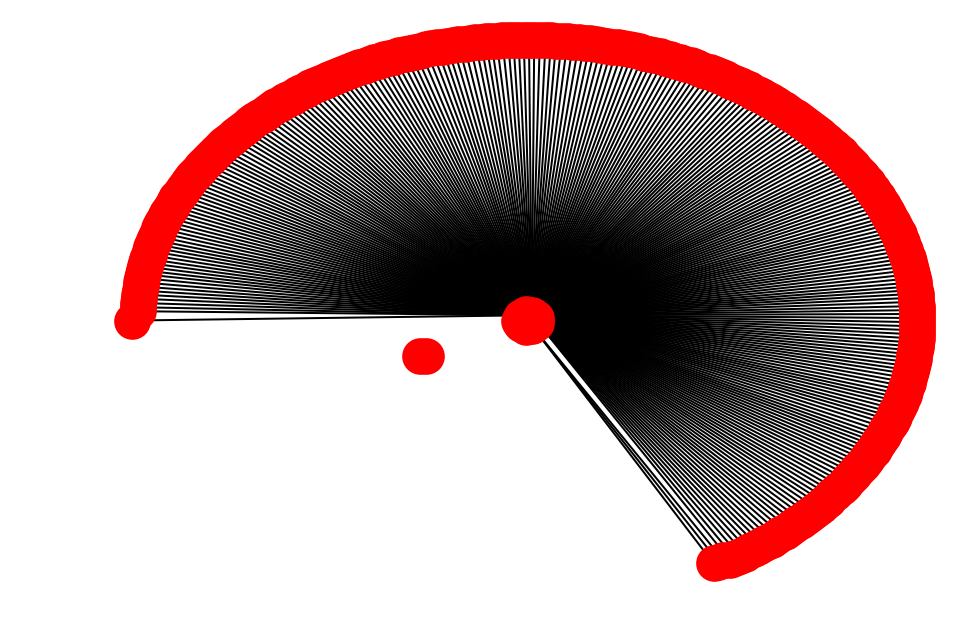

In [6]:
from networkx.drawing.nx_agraph import graphviz_layout

pos = graphviz_layout(G, prog="circo")
nx.draw(G,pos)

In order to answer the question of `which nodes are important`, we need to specify things a bit more. Perhaps a measure such as betweenness centrality or degree centrality may be appropriate here.

The naive way would be to iterate over all the rows. Go ahead and try it at your own risk - it may take a long time :-). Alternatively, I would suggest doing a pandas groupby.

Use nx.draw_kamada_kawai(my_graph) to draw the filtered graph to screen. This uses a force-directed layout.

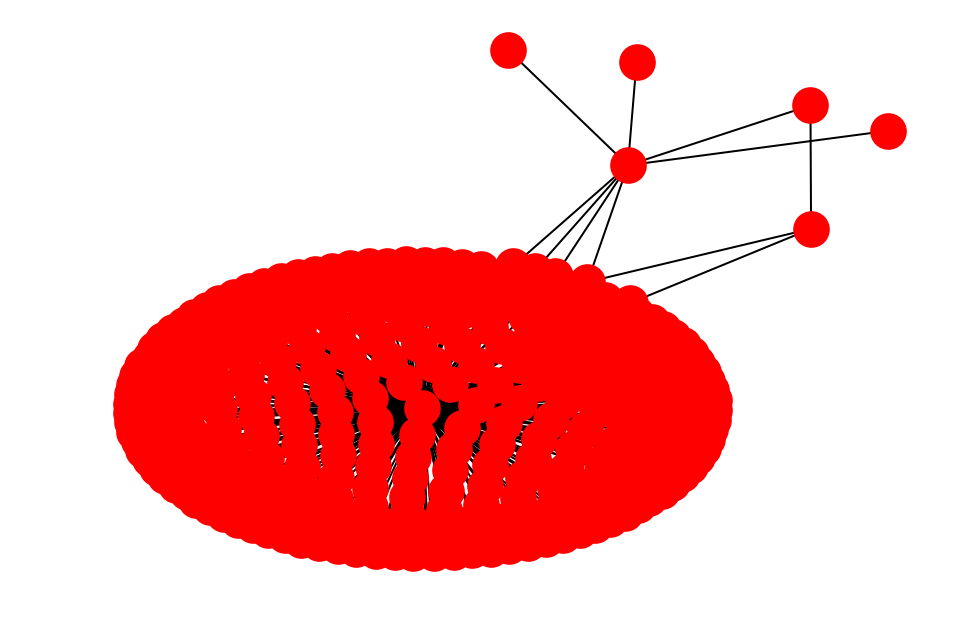

In [7]:
nx.draw_kamada_kawai(G)

These slides/demos are based on concepts from: https://github.com/ericmjl/Network-Analysis-Made-Simple.